<a href="https://colab.research.google.com/github/sumperor/currency_basket_wallet/blob/main/A1_All_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: Assignment One - Group Two
format: pdf
---

\begin{center}
\textbf{Application of R For Finance}
\end{center}

\vspace{2cm}
\begin{center}
\textbf{Authors:}\\
\text{}\\
\text{Aghulan Sivakaran, Alvaro Camacho, Yujiang Luo,}\\
\text{Sumedh Garimella, Yunjie Wu}
\end{center}

\vspace{5cm}

\begin{center}
\textbf{Date: 5 October 2025}
\end{center}



\newpage
\tableofcontents
\listoffigures
\listoftables
\newpage

## Initialisation

In [ ]:
# Loading the Libraries

library(dplyr)
library(lubridate)
library(ggplot2)

# Loading the Assignment Data File
All_data <- read.csv('compustat_food_bev.csv')

# Converting the dates
All_data$datadate <- as.Date(All_data$datadate, format = "%d/%m/%Y")

# Converting the column names for easier readability
All_data <- All_data %>%
  rename(
    close_price       = prccd,
    high        = prchd,
    low         = prcld,
    volume      = cshtrd,
    open_price        = prcod
  )

# Pulling the data for each stock
DPZ_data <- filter(All_data, tic == "DPZ")
sbux_data <- filter(All_data, tic == "SBUX")
pbpb <- filter(All_data, tic == "PBPB")
WEN_data <- filter(All_data, tic == "WEN")
cmg_data <- filter(All_data, tic =="CMG")

,GVKEY,iid,datadate,tic,conm,volume,close_price,high,low,open_price,exchg,sic
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,165914,1,2020-09-01,CMG,CHIPOTLE MEXICAN GRILL INC,334534,1372.22,1373.500,1319.980,1325.00,11,5812
2,165914,1,2020-09-02,CMG,CHIPOTLE MEXICAN GRILL INC,331489,1379.03,1384.461,1355.600,1375.00,11,5812
3,165914,1,2020-09-03,CMG,CHIPOTLE MEXICAN GRILL INC,463298,1328.73,1374.220,1310.240,1355.48,11,5812
4,165914,1,2020-09-04,CMG,CHIPOTLE MEXICAN GRILL INC,400679,1313.73,1342.470,1258.527,1332.89,11,5812
5,165914,1,2020-09-08,CMG,CHIPOTLE MEXICAN GRILL INC,318424,1299.75,1335.070,1275.010,1288.28,11,5812
6,165914,1,2020-09-09,CMG,CHIPOTLE MEXICAN GRILL INC,305122,1321.03,1337.840,1306.105,1322.00,11,5812


## All Stock Features and Metrics

### SBUX

In [ ]:
library(dplyr)
library(lubridate)

# Create transformed dataset
sbux_data2 <- sbux_data %>%
  arrange(datadate) %>%
  mutate(
    daily_return  = (close_price / lag(close_price)) - 1,
    momentum_10d  = close_price - lag(close_price, 10),
    daily_range   = high - low,
    mfv           = case_when(
      high != low ~ (((close_price - low) - (high - close_price)) / (high - low)) * volume,
      TRUE        ~ NA_real_
    ),
    month_val     = month(datadate),
    year_val      = year(datadate)
  ) %>%
  filter(!is.na(daily_return))


# Q7: Total trading volume June 2023
total_vol_june2023 <- sbux_data2 %>%
  filter(year_val == 2023, month_val == 6) %>%
  summarise(total_vol = sum(volume, na.rm = TRUE)) %>%
  pull(total_vol)

# Q8: Mean daily return
mean_daily_return <- sbux_data2 %>%
  summarise(mean_ret = mean(daily_return, na.rm = TRUE)) %>%
  pull(mean_ret)

# Q9: Date(s) with max high
q9 <- sbux_data2 %>%
  filter(high == max(high, na.rm = TRUE)) %>%
  mutate(date = format(datadate, "%Y-%m-%d")) %>%
  select(date, high)

# Q10: Date(s) with max daily return
q10 <- sbux_data2 %>%
  filter(daily_return == max(daily_return, na.rm = TRUE)) %>%
  mutate(date = format(datadate, "%Y-%m-%d")) %>%
  select(date, daily_return)

# Print
cat("Q7: Total trading volume in June 2023 for SBUX =", total_vol_june2023, "\n")
cat("Q8: Mean daily return for SBUX =", round(mean_daily_return, 10), "\n")

cat("Q9: Date(s) with largest high price for SBUX:\n")
print(q9)

cat("Q10: Date(s) with largest daily return for SBUX:\n")
print(q10)


Q7: Total trading volume in June 2023 for SBUX = 151045270 
Q8: Mean daily return for SBUX = 0.0002910467 
Q9: Date(s) with largest high price for SBUX:
        date   high
1 2021-07-23 126.32
Q10: Date(s) with largest daily return for SBUX:
        date daily_return
1 2022-05-04   0.09834522


### DPZ

In [ ]:
# Calculating and adding the daily return column
DPZ_data <- mutate(DPZ_data, Daily_Return = (close_price - lag(close_price)) / lag(close_price))

# Calculating and adding the volume change
DPZ_data <- mutate(DPZ_data, Volume_Change = volume - lag(volume))

# Calculating and adding the close-open change
DPZ_data <- mutate(DPZ_data, Intraday = close_price - open_price)

# Calculating and adding money flow volume indicator (MFV)
DPZ_data <- mutate(DPZ_data, MFV = ((close_price-low)-(high-close_price))/(high-low)*volume)

#Column that indicates the month and year
DPZ_data <- mutate(DPZ_data, Month = month(DPZ_data$datadate), .before = tic)
DPZ_data <- mutate(DPZ_data, Year = year(DPZ_data$datadate), .before = Month)

# The Total Trading Volume in June 2023
Total_Vol = sum(DPZ_data$volume, na.rm = TRUE)

# The Mean Daily Return Over the Entire Period
Mean_Daily_Return = mean(DPZ_data$Daily_Return, na.rm = TRUE)

# Displaying the Added Columns
DPZ_data_selected <- select(DPZ_data, datadate, Daily_Return, Volume_Change, Intraday, MFV)
DPZ_data_selected

cat(paste("Q7: Total trading volume in June 2023 for DPZ =", Total_Vol, "\n"))
cat(paste("Q8: Mean daily return for DPZ =", round(Mean_Daily_Return, 6), "\n"))

cat("Q9: Date with largest high price for DPZ:")
# Largest Positive High Price
Largest_Price = max(DPZ_data$high, na.rm = TRUE)
DPZ_data$datadate[DPZ_data$high == Largest_Price & !is.na(DPZ_data$high)]


cat("Q10: Date with largest daily return for DPZ:")
# Largest Daily Return
Largest_Daily_Return = max(DPZ_data$Daily_Return, na.rm = TRUE)
DPZ_data$datadate[DPZ_data$Daily_Return == Largest_Daily_Return & !is.na(DPZ_data$Daily_Return)]

datadate,Daily_Return,Volume_Change,Intraday,MFV
<date>,<dbl>,<int>,<dbl>,<dbl>
2020-09-01,NA,NA,1.71,242543.66
2020-09-02,-0.0159697672,82926,-6.26,-476743.77
2020-09-03,-0.0151139742,213809,-5.50,119851.67
2020-09-04,-0.0394716981,58602,-15.80,-479784.60
2020-09-08,-0.0143788795,-174961,-5.25,-655623.86
2020-09-09,0.0152795493,-88503,-0.43,-332206.15
2020-09-10,0.0180595179,88789,5.03,-20683.83
2020-09-11,0.0146797954,36899,-6.71,-442885.26
2020-09-14,-0.0156075808,-200074,-6.93,-245008.60


Q7: Total trading volume in June 2023 for DPZ = 459184356 
Q8: Mean daily return for DPZ = 0.000131 
Q9: Date with largest high price for DPZ:

[1] "2021-12-31"

Q10: Date with largest daily return for DPZ:

[1] "2021-07-22"

### Comments on DPZ Analysis

Based on the analysis, DPZ had the highest daily return on July 22, 2021, when it jumped nearly 12%. The cause of this spike was likely due to the release of their Q2 2021 financial results, which beat analysts' estimates, as new menu items boosted sales and led to a 3.5% rise in the US same-store sales. They also announced a new $1 billion share buyback plan, which could also contribute to the rise. DPZ saw its largest high price on December 31, 2021, following solid 2021 earnings. However, the price started declining after inflation took hold of the market in 2022.

### WEN

In [ ]:
# daily return
WEN_data<- mutate(WEN_data, return_daily =(close_price-lag(close_price))/lag(close_price))
WEN_data<- filter(WEN_data,!is.na(return_daily))

# overnight return
WEN_data<- mutate(WEN_data, return_overnight = (open_price-lag(close_price))/lag(close_price))

#volume change
WEN_data<- mutate(WEN_data, change_volume = volume - lag(volume))
# money flow volume indicator
WEN_data<- mutate(WEN_data, MFV = (((close_price - low)-(high - close_price))/(high-low)) * volume)

# month and year
WEN_data$month<- month(WEN_data$datadate)
WEN_data$year<- year(WEN_data$datadate)

#total trading volume 2023
t_t_v_J_2023<-summarise(filter(WEN_data,month==6,year==2023),total_volume= sum(volume))

#mean daily return
M_D_R<-summarise(WEN_data,mean_return= mean(return_daily))

#largest positive high price
L_P_H_P<-select(filter(WEN_data,!is.na(high) & high==max(high)),datadate,high)

#largest positive daily return
L_P_D_R<-select(filter(WEN_data,return_daily==max(return_daily)),datadate,return_daily)

WEN_data <- select(WEN_data, datadate, return_daily, return_overnight, change_volume, MFV)
WEN_data

cat(paste("Q7: Total trading volume in June 2023 for WEN =", t_t_v_J_2023, "\n"))
cat(paste("Q8: Mean daily return for WEN =", round(M_D_R, 6), "\n"))
cat("Q9: Date with largest high price for WEN:\n")
print(L_P_H_P)
cat("Q10: Date with largest daily return for WEN:\n")
print(L_P_D_R)





datadate,return_daily,return_overnight,change_volume,MFV
<date>,<dbl>,<dbl>,<int>,<dbl>
2020-09-02,0.0486873508,NA,NA,3030530.4
2020-09-03,-0.0009103323,-0.0009103323,466079,-1153558.0
2020-09-04,-0.0168564920,0.0113895216,-929061,-2148667.3
2020-09-08,0.0125115848,-0.0069508804,87249,1761526.1
2020-09-09,0.0295194508,0.0068649886,-591443,2005637.5
2020-09-10,-0.0286730385,0.0024449878,-59870,-2741392.7
2020-09-11,-0.0173913043,0.0073226545,-462401,-664416.0
2020-09-14,0.0260829064,0.0074522590,1315156,2556174.4
2020-09-15,-0.0077167499,0.0031774852,-1044067,-1476466.8


Q7: Total trading volume in June 2023 for WEN = 54557454 
Q8: Mean daily return for WEN = 0.000116 
Q9: Date with largest high price for WEN:
    datadate  high
1 2021-06-08 29.46
Q10: Date with largest daily return for WEN:
    datadate return_daily
1 2021-06-08    0.2585004


**Comments on WEN analysis**

The primary factor behind WEN's sharp rise from June to August 2021 was a combination of fundamentals and market sentiment.   The company's second-quarter earnings report, which showed significant increases in revenue, net profit, and same-store sales, increased investor confidence in the company's long-term prospects.  The report also raised its guidance for growth and expansion.   Second, because WEN was marketed as a "meme stock" on social media platforms like Reddit, its share price rose in early June as a result of short-term capital inflows.   WEN's share price saw a significant increase during this period due to a combination of favourable fundamentals and the boom in retail investments.

### CMG

In [ ]:
cmg_data <- cmg_data %>%
  mutate(
    # 1. Daily return
    daily_ret = (close_price - lag(close_price)) / lag(close_price),

    # 2. Volume change
    vol_change = volume - lag(volume),

    # 3. 10-day momentum
    momentum_10d = close_price - lag(close_price, 10),

    # 4. Money Flow Volume
    mfv = ifelse(
      high != low,
      (( (close_price - low) - (high - close_price) ) / (high - low)) * volume,
      NA_real_
    ),

    # 5. Month and year
    month = month(datadate),
    year  = year(datadate),

    # 6. Max high and max daily return
    max_high_val   = max(high, na.rm = TRUE),
    max_return_val = max(daily_return, na.rm = TRUE),
    is_max_high    = high == max_high_val,
    is_max_return  = daily_ret == max_return_val
  ) %>%
  filter(!is.na(daily_return))

head(cmg_data %>%
       select(datadate, daily_ret, vol_change, momentum_10d, mfv))

# Q7. Total trading volume in June 2023
total_vol_june2023 <- cmg_data %>%
  filter(year == 2023, month == 6) %>%
  summarise(total_volume = sum(volume, na.rm = TRUE)) %>%
  pull(total_volume)

# Q8. Mean daily return
mdr <- mean(cmg_data$daily_ret, na.rm = TRUE)

# Q9. Date with the highest high price
q9 <- cmg_data %>%
  filter(is_max_high) %>%
  transmute(date = format(datadate, "%Y-%m-%d"), high)

# Q10. Date with the highest daily return
q10 <- cmg_data %>%
  filter(is_max_return) %>%
  transmute(date = format(datadate, "%Y-%m-%d"), daily_ret)

# Print Results
cat(paste("Q7. Total trading volume in June 2023 =", total_vol_june2023, "\n"))
cat(paste("Q8: Mean daily return =", round(mdr, 6), "\n"))

cat("Q9: Date with the highest high price:\n")
print(q9)

cat("Q10: Date with the highest daily return:\n")
print(q10)

,datadate,daily_ret,vol_change,momentum_10d,mfv
,<date>,<dbl>,<int>,<dbl>,<dbl>
1,2020-09-14,NA,NA,NA,-262570.62
2,2020-09-15,0.008025632,-107937,NA,-85141.28
3,2020-09-16,-0.008995115,-24237,NA,-257984.29
4,2020-09-17,-0.031993807,147435,NA,-103314.12
5,2020-09-18,-0.008071032,331185,NA,-292595.13
6,2020-09-21,-0.007371573,-474653,NA,280004.81


Q7. Total trading volume in June 2023 = 5392605 
Q8: Mean daily return = 0.000786 
Q9: Date with the highest high price:
        date    high
1 2023-07-19 2175.01
Q10: Date with the highest daily return:
        date daily_ret
1 2022-07-27 0.1470416


The Reason for the highest daily return on 2022-07-27 is Chipotle has released it second quarter annual returns which beat market expectations as it could offset the cost by successful price hikes

### PBPB

In [ ]:
# 1.1. Create "metrics" columns

pbpb =
    pbpb %>%
        mutate(
            return_daily = (close_price - lag(close_price)) / lag(close_price),
            return_overnight = (open_price - lag(close_price)) / lag(close_price),
            change_close_open = close_price - open_price,
            mfv = (((close_price - low) - (high - close_price)) / (high - low)) * volume
            )


head(pbpb)

# 1.2. Create "month" and "year" columns

pbpb =
    pbpb %>%
        mutate(
            month = as.integer(format(datadate, "%m")),
            year = as.integer(format(datadate, "%Y"))
            )
head(pbpb)

# 1.3. Display "metrics"

volume_june_2023 =
    pbpb %>%
        filter(month==6, year==2023) %>%
        summarize(volume = sum(volume, na.rm=TRUE))
volume_june_2023

mean_daily_return =
    pbpb %>%
        summarize(mean_daily_return = mean(return_daily, na.rm=TRUE))
mean_daily_return

date_largest_high =
    pbpb %>%
        filter(high==max(high, na.rm=TRUE)) %>%
        summarize(date_largest_high=first(datadate))
date_largest_high

date_largest_positive_return =
    pbpb %>%
        filter(return_daily==max(return_daily, na.rm=TRUE)) %>%
        summarize(date_largest_positive_return = first(datadate))
date_largest_positive_return


,GVKEY,iid,datadate,tic,conm,volume,close_price,high,low,open_price,exchg,sic,return_daily,return_overnight,change_close_open,mfv
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,18839,1,2020-09-01,PBPB,POTBELLY CORP,374507,4.35,4.510,4.18,4.28,14,5812,NA,NA,0.07,11348.70
2,18839,1,2020-09-02,PBPB,POTBELLY CORP,220405,4.41,4.500,4.27,4.32,14,5812,0.01379310,-0.006896552,0.09,47914.13
3,18839,1,2020-09-03,PBPB,POTBELLY CORP,288718,4.17,4.630,4.15,4.43,14,5812,-0.05442177,0.004535147,-0.26,-264658.17
4,18839,1,2020-09-04,PBPB,POTBELLY CORP,398823,4.06,4.275,3.97,4.23,14,5812,-0.02637890,0.014388489,-0.17,-163452.05
5,18839,1,2020-09-08,PBPB,POTBELLY CORP,284337,3.91,4.140,3.91,4.05,14,5812,-0.03694581,-0.002463054,-0.14,-284337.00
6,18839,1,2020-09-09,PBPB,POTBELLY CORP,152405,3.95,4.053,3.83,3.92,14,5812,0.01023018,0.002557545,0.03,11618.32


,GVKEY,iid,datadate,tic,conm,volume,close_price,high,low,open_price,exchg,sic,return_daily,return_overnight,change_close_open,mfv,month,year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,18839,1,2020-09-01,PBPB,POTBELLY CORP,374507,4.35,4.510,4.18,4.28,14,5812,NA,NA,0.07,11348.70,9,2020
2,18839,1,2020-09-02,PBPB,POTBELLY CORP,220405,4.41,4.500,4.27,4.32,14,5812,0.01379310,-0.006896552,0.09,47914.13,9,2020
3,18839,1,2020-09-03,PBPB,POTBELLY CORP,288718,4.17,4.630,4.15,4.43,14,5812,-0.05442177,0.004535147,-0.26,-264658.17,9,2020
4,18839,1,2020-09-04,PBPB,POTBELLY CORP,398823,4.06,4.275,3.97,4.23,14,5812,-0.02637890,0.014388489,-0.17,-163452.05,9,2020
5,18839,1,2020-09-08,PBPB,POTBELLY CORP,284337,3.91,4.140,3.91,4.05,14,5812,-0.03694581,-0.002463054,-0.14,-284337.00,9,2020
6,18839,1,2020-09-09,PBPB,POTBELLY CORP,152405,3.95,4.053,3.83,3.92,14,5812,0.01023018,0.002557545,0.03,11618.32,9,2020


volume
<int>
6780601


mean_daily_return
<dbl>
0.001279868


date_largest_high
<date>
2023-04-26


date_largest_positive_return
<date>
2021-03-15


date_largest_volume
<date>
2023-06-23


**PBPB Analysis**

On April 26, 2023, Potbelly Corp’s stock recorded its highest daily high price in the observed period. This spike likely reflected positive market sentiment surrounding the company’s ongoing post-pandemic recovery and store expansion initiatives announced around that time.

The largest positive daily return, on March 15, 2021, may correspond to early signs of recovery in the restaurant sector following the easing of pandemic restrictions. Broader optimism in the U.S. food service industry likely contributed to this sudden increase in Potbelly’s stock value.

While no specific corporate announcements were verified for these dates, both movements are consistent with periods of renewed investor confidence and sector-wide rebounds.

## Visualisation

### Figure One

,exchg,num_tickers
,<int>,<int>
1,14,36
2,11,16
3,12,1
4,19,1


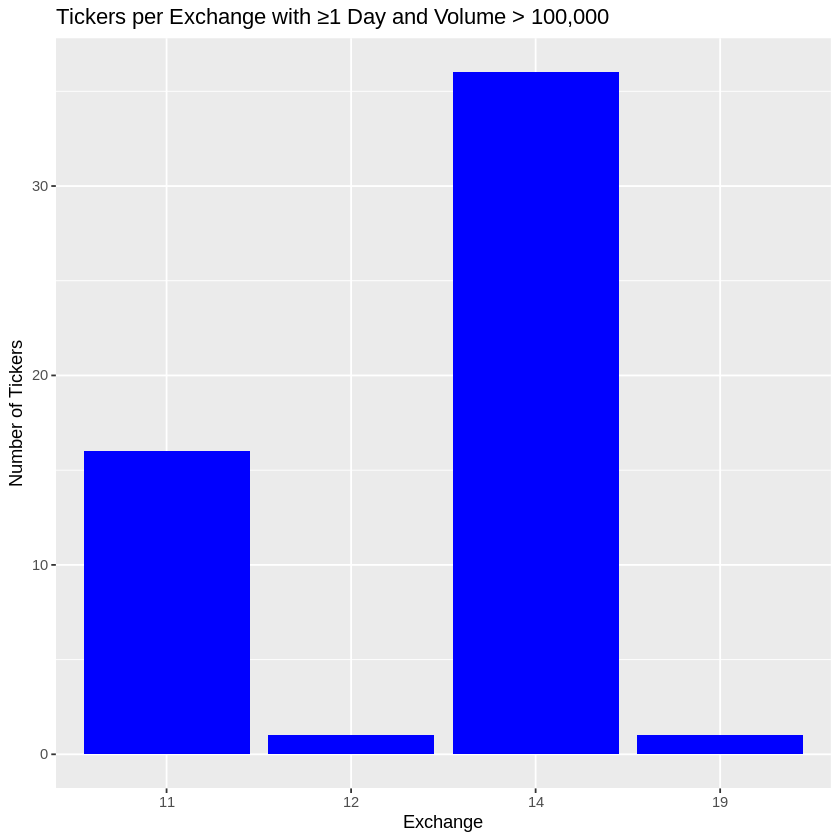

In [ ]:
# Code for Figure One
fig1 <- All_data %>%
  filter(volume > 100000) %>%
  distinct(tic, exchg) %>%
  count(exchg, name = "num_tickers") %>%
  arrange(desc(num_tickers))

head(fig1)

ggplot(fig1, aes(x = factor(exchg), y = num_tickers)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(
    title = "Tickers per Exchange with ≥1 Day and Volume > 100,000",
    x = "Exchange",
    y = "Number of Tickers")

## Figure Two

In [ ]:
tickers <- c("DPZ", "SBUX", "PBPB", "CMG", "WEN")
All_data <- All_data[All_data$tic %in% tickers, ]

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


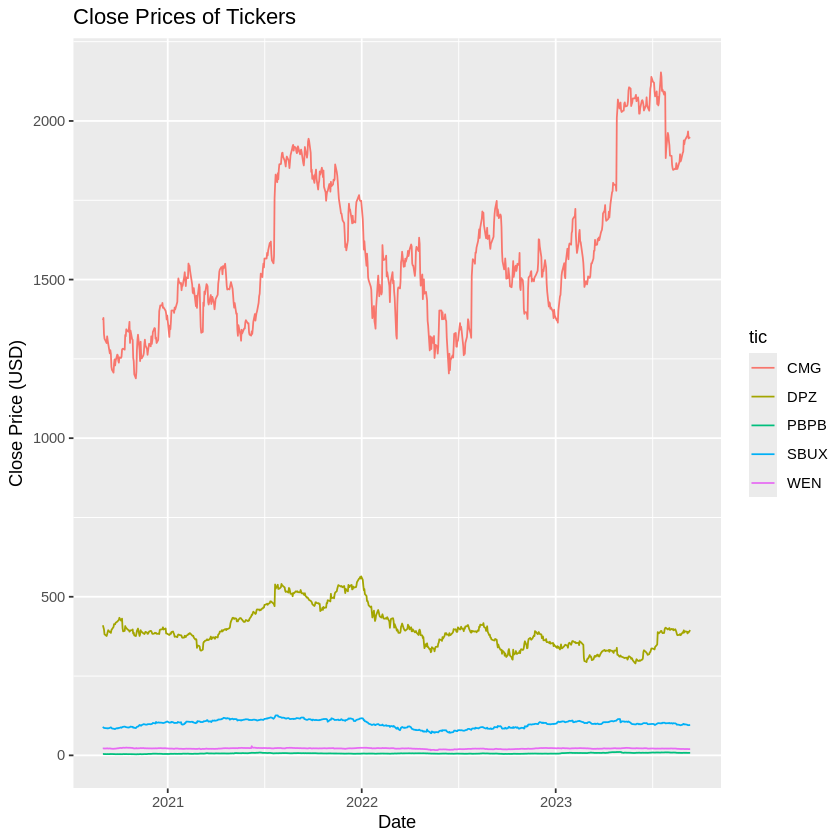

In [ ]:
ggplot(All_data, aes(x = datadate, y = close_price, color = tic)) +
  geom_line() +
  labs(title = "Close Prices of Tickers", x = "Date", y = "Close Price (USD)")

## Figure Three

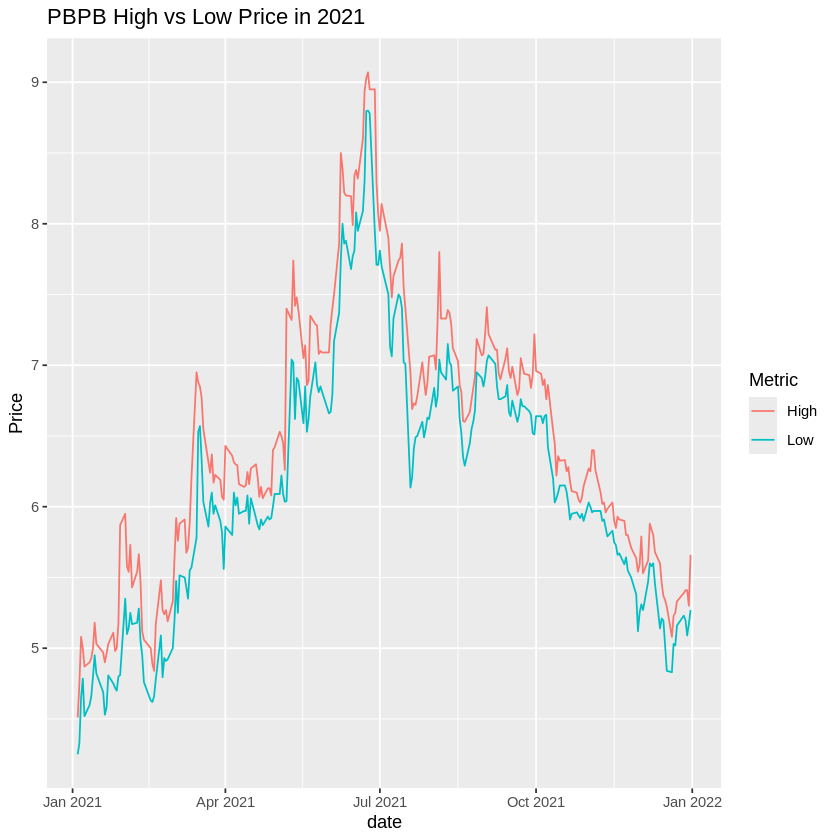

In [ ]:
pbpb_2021 <- pbpb %>%
  filter(year(datadate) == 2021)
ggplot(pbpb_2021,aes(x = datadate)) +
 geom_line(aes(y = high,color = "High")) +
 geom_line(aes(y = low,color = "Low")) +
 labs(title = "PBPB High vs Low Price in 2021", x = "date", y = "Price", color = "Metric")


## Figure Four

date_largest_volume
<date>
2023-06-23


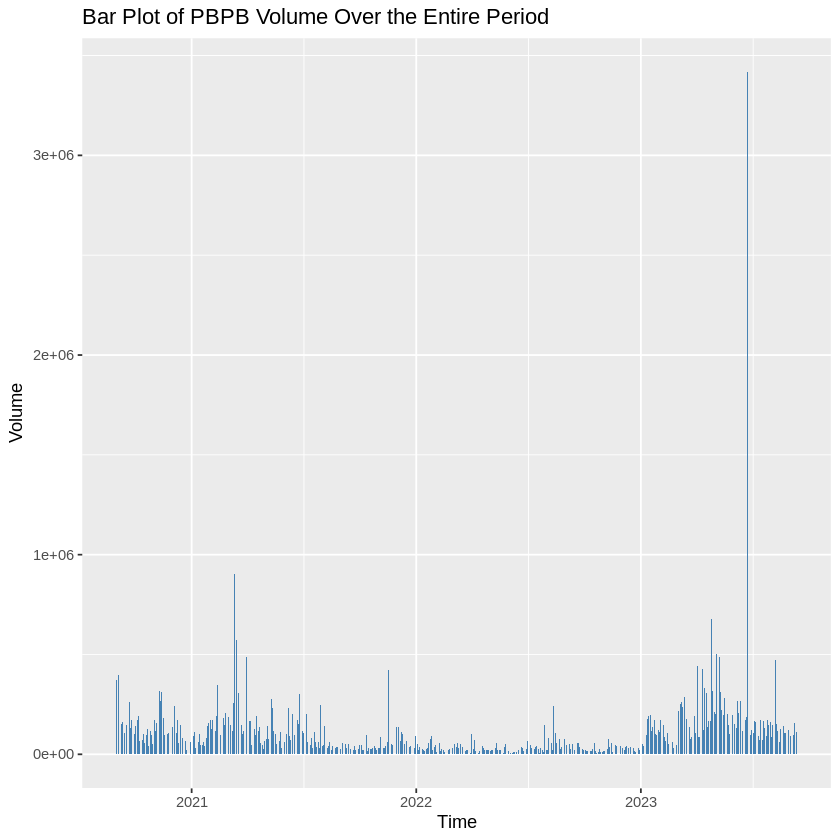

In [ ]:
ggplot(pbpb, aes(x = datadate, y = volume)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Bar Plot of PBPB Volume Over the Entire Period",
       x = "Time",
       y = "Volume")

# Largest Volume Date
date_largest_volume =
    pbpb %>%
        filter(volume==max(volume, na.rm=TRUE)) %>%
        summarize(date_largest_volume = first(datadate))
date_largest_volume


## Figure Five

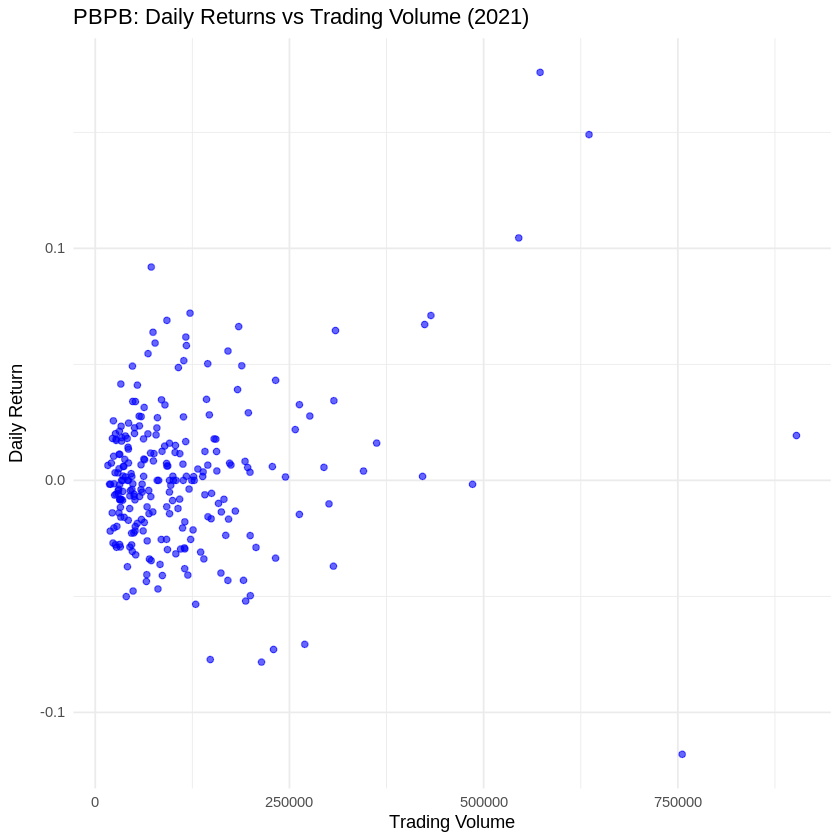

In [ ]:
pbpb <- pbpb %>%
  arrange(datadate) %>%
  mutate(
    daily_return = (close_price / lag(close_price)) - 1,
    year  = year(datadate),
    month = month(datadate)
  )

pbpb_2021 <- pbpb %>%
  filter(year == 2021)

ggplot(pbpb_2021, aes(x = volume, y = daily_return)) +
  geom_point(alpha = 0.6, color = "blue") +
  labs(
    title = "PBPB: Daily Returns vs Trading Volume (2021)",
    x = "Trading Volume",
    y = "Daily Return"
  ) +
  theme_minimal()


## Comments on Visualizations

(For figure 1 and 2 here)

Looking at the visualization, we can see which exchanges had tickers with trading volumes over 100,000 on at least one day. Exchange 14 clearly dominates, with Exchange 11 coming in second. Meanwhile, Exchanges 12 and 19 barely register any activity at all. This indicates that the food and beverage stocks that are actually traded in significant volumes tend to cluster on just a few exchanges. Essentially, if you're seeking liquidity and market depth in this sector, Exchanges 14 and 11 are the ones to look at.

The line graph displays the closing prices of five restaurant chains from 2020 to 2023: CMG, DPZ, SBUX, PBPB, and WEN. CMG is the most expensive stock showing a lot of volatility. DPZ trades in the middle, and the other three, SBUX, PBPB, and WEN, have much lower prices, typically below $150, and appear almost flat because the chart's scale is dominated by CMG's high values.

(for figure 3,4,5 starting below---)

Based on our analysis, PBPB displayed the highest mean daily return, with a value of approximately 0.128%, and it was selected as the focus of our virtualisations.

PBPB stock price has seen highs and lows throughout 2021. Both the high and low price indicators rose steadily starting in January and peaked around $9 in June-July before falling sharply toward the end of the year.

In terms of its volume during the entire period, regions of higher volumes are observed for the years 2021 and 2023, where a relatively lower volume is shown for 2022. Although no direct links have been found between news and the observed reduced volume, one possible explanation is the overall reduced market sentiment in 2022, as central banks around the world hiked rates to combat inflation. Regarding the volume spike on the 23rd of June in 2023, it could be linked to the appointment of a new Chief People Officer on the 13th of June, which is important for its growth plan.


2021 scatter plots showing clustered returns and rare high-volume spikes driving extreme price movements.
